In [66]:
# import packages
import pandas as pd
import numpy as np
import plotly.express as px
import os

In [67]:
# define desired directory path
#directory_path = "/Users/treypallace/Desktop/Fourth Year Fall 2023/ds 4002/Project_Data/linkedin"

# use os.chdir() to change the working directory
#os.chdir(directory_path)

# read in the data
job_postings_df = pd.read_csv("job_postings.csv")
job_skills_df = pd.read_csv("job_skills.csv")


In [33]:
job_postings_df.tail(5)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY
15885,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,NaN,NaN,NaN,NaN,Full-time,"Vicksburg, MS",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN


In [34]:
job_skills_df.tail(10)

,job_id,skill_abr
27889,3701373514,MNFC
27890,3701373515,ENG
27891,3701373515,IT
27892,3701373516,ENG
27893,3701373516,IT
27894,3701373522,ADM
27895,3701373523,HCPR
27896,3701373524,OTHR
27897,3701373527,BD
27898,3701373527,SALE


### Join the job_postings_df with the job_skills_df

In [68]:
# merge data
df = job_postings_df.merge(job_skills_df, on='job_id',  how='left')

In [69]:
# select columns
df = df[['job_id', 'description', 'max_salary', 'med_salary', 'min_salary', 'pay_period', 'currency', 'work_type','compensation_type','skill_abr', 'location', 'title']]

In [70]:
# convert every salary to hourly pay period 
def convert_to_hourly(row):
    if row['pay_period'] == 'YEARLY':
        if row['work_type'] in ['FULL_TIME', 'CONTRACT']:
            return row['min_salary'] / (40 * 52), row['max_salary'] / (40 * 52)
        elif row['work_type'] == 'PART_TIME':
            return row['min_salary'] / (20 * 52), row['max_salary'] / (20 * 52)
    elif row['pay_period'] == 'MONTHLY':
        if row['work_type'] in ['FULL_TIME', 'CONTRACT']:
            return row['min_salary'] * 12 / (40 * 52), row['max_salary'] * 12 / (40 * 52)
        elif row['work_type'] == 'PART_TIME':
            return row['min_salary'] * 12 / (20 * 52), row['max_salary'] * 12 / (20 * 52)
    else:
        return row['min_salary'], row['max_salary']

# Apply the function to the DataFrame using a lambda function
df[['min_salary', 'max_salary']] = df.apply(lambda row: convert_to_hourly(row), axis=1, result_type='expand')


In [71]:
# calculate average salary
df['avg_salary'] = (df['max_salary'] + df['min_salary']) / 2

In [28]:
nan_counts = df.isna().sum()
nan_counts

job_id                   0
description              2
max_salary           17847
med_salary           25826
min_salary           17847
pay_period           16069
currency             16069
compensation_type    16069
skill_abr              637
location                 0
work_type                0
title                    0
avg_salary           17847
dtype: int64

In [72]:
# filter to remove rows without descriptions or avg_salary
df = df.dropna(subset=['description', 'avg_salary'])

In [73]:
df.shape

(9701, 13)

In [33]:
df['currency'].unique()

array(['USD', nan], dtype=object)

In [35]:
df['compensation_type'].unique()

array(['BASE_SALARY', nan], dtype=object)

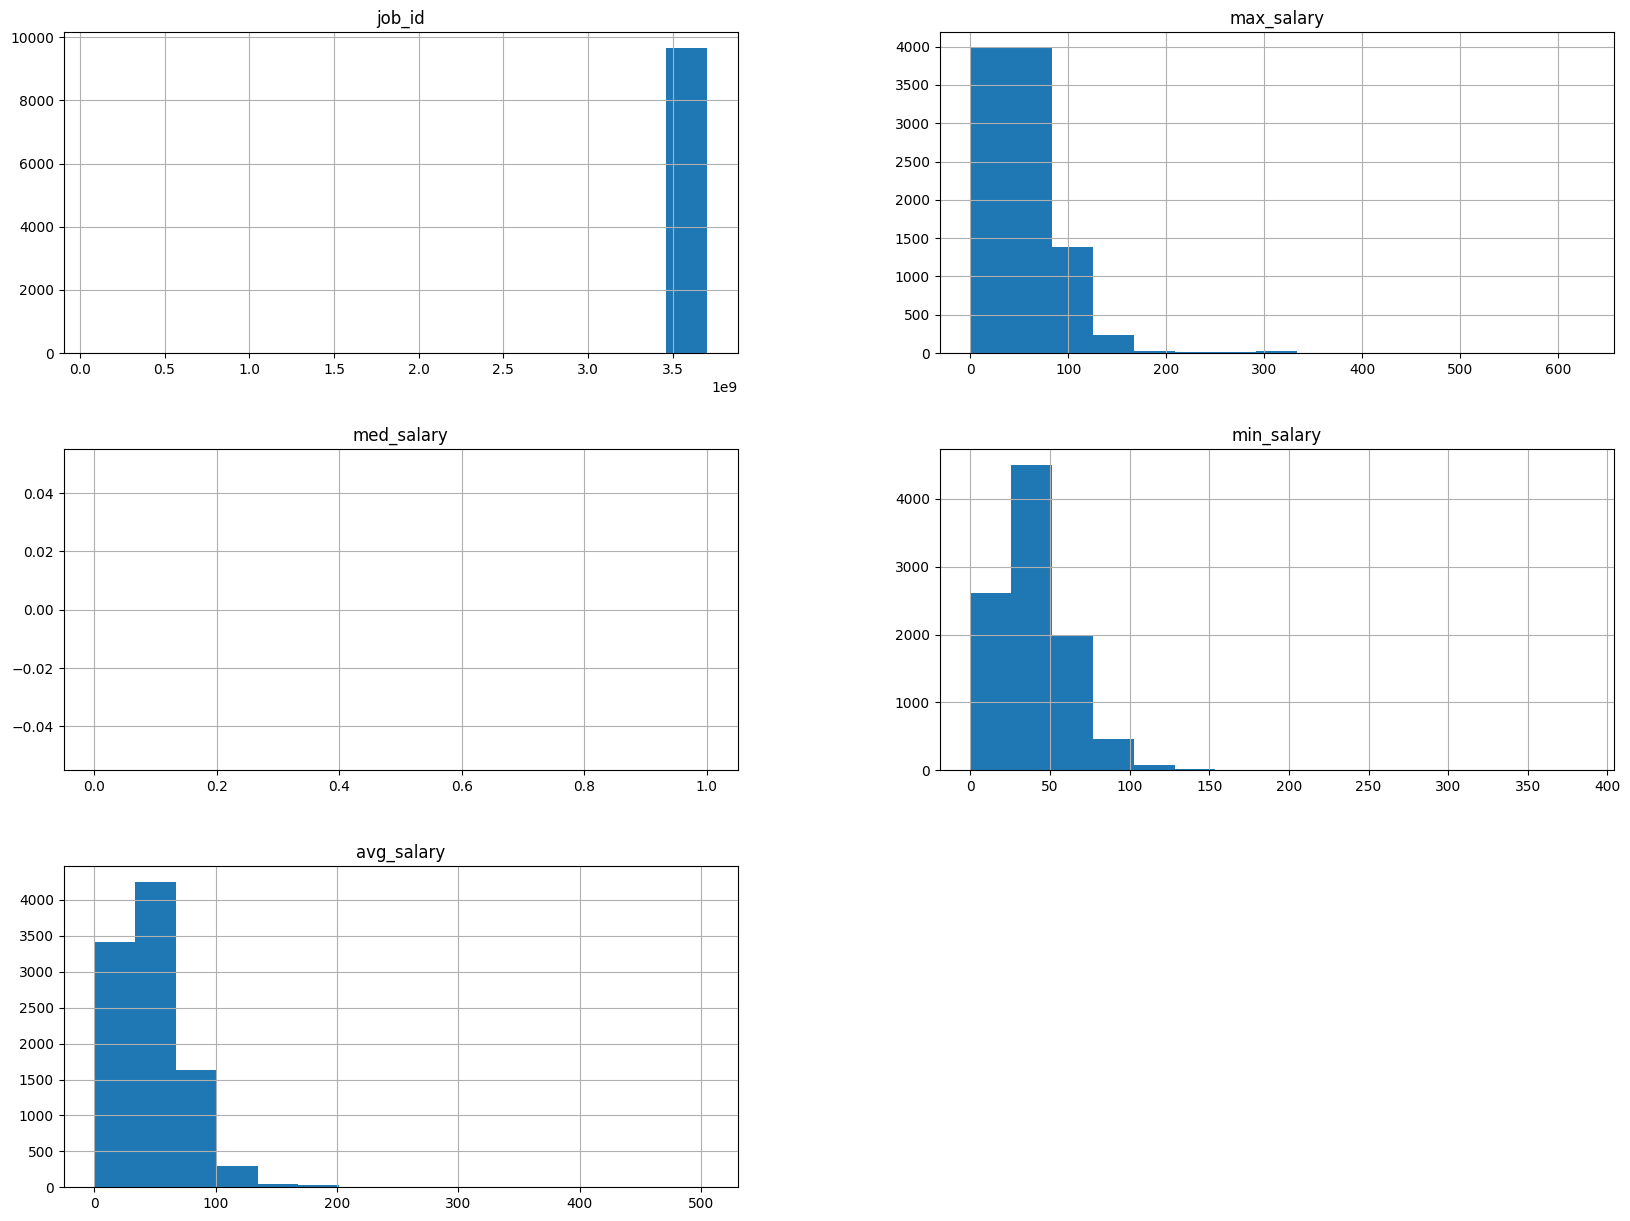

In [75]:
#!pip install matplotlib
#!pip install inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=15, figsize=(20,15))
plt.show()

In [78]:
#!pip install scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy="median")

num_attribs = ["max_salary", "min_salary", "avg_salary"]
cat_attribs = ["job_id","description", "pay_period", "currency", "compensation_type", "skill_abr", "location", "work_type", "title"]

housing_num = df.drop(cat_attribs, axis=1)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 9.7 MB/s eta 0:00:00:00:010:01m
  Using cached scipy-1.11.2-cp310-cp310-macosx_12_0_arm64.whl (29.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.0 MB/s eta 0:00:00


/Users/treypallace/miniconda3/lib/python3.10/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: ['med_salary']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)

/Users/treypallace/miniconda3/lib/python3.10/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: ['med_salary']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


## Convert descriptions to numeric data

In [82]:
#!pip install nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re, collections
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 4.0 MB/s eta 0:00:00a 0:00:01


In [85]:
# Tokenize a sentence into words

def sentence_to_wordlist(raw_sentence):
    
    clean_sentence = re.sub("[^a-zA-Z0-9]"," ", raw_sentence)
    tokens = nltk.word_tokenize(clean_sentence)
    
    return tokens


# tokenizing a description into a list of word lists

def tokenize(description):
    stripped_description = description.strip()
    
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(stripped_description)
    
    tokenized_sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            tokenized_sentences.append(sentence_to_wordlist(raw_sentence))
    
    return tokenized_sentences

# getiing Bag of Words (BOW) counts
def get_count_vectors(descriptions):
    
    vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
    
    count_vectors = vectorizer.fit_transform(descriptions)
    
    feature_names = vectorizer.get_feature_names_out()
    
    return feature_names, count_vectors

In [86]:
feature_names_cv, count_vectors = get_count_vectors(df['description'])

In [92]:
# convert all words to lowercase
count_vectors = count_vectors.astype(float)
count_vectors[count_vectors > 0] = 1  # Convert non-zero counts to 1 (binary)

# sum the counts for each word across all descriptions
word_frequencies = count_vectors.sum(axis=0)

# create a DataFrame to store word frequencies
word_frequency_df = pd.DataFrame({'Word': feature_names_cv, 'Frequency': word_frequencies.flat})

# sort the DataFrame by frequency in descending order
word_frequency_df = word_frequency_df.sort_values(by='Frequency', ascending=False)

# display the most frequent words
print(word_frequency_df.head(30))

                  Word  Frequency
3534        experience     8957.0
9779              work     8221.0
8981              team     7429.0
8368            skills     7265.0
9955             years     7193.0
4540         including     6778.0
9170              time     6115.0
4900               job     6069.0
6695          position     5987.0
5471        management     5799.0
1088          benefits     5716.0
218            ability     5681.0
6150       opportunity     5622.0
1269          business     5403.0
1874           company     5400.0
7865              role     5386.0
2488            degree     5321.0
7750  responsibilities     5280.0
9874           working     5271.0
8894           support     5176.0
1832     communication     5167.0
7504           related     5150.0
7648          required     5107.0
5946               new     5084.0
5006         knowledge     4968.0
1010             based     4855.0
7309             range     4830.0
3305       environment     4815.0
7683      requ